In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# **Making a random classification dataset**

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

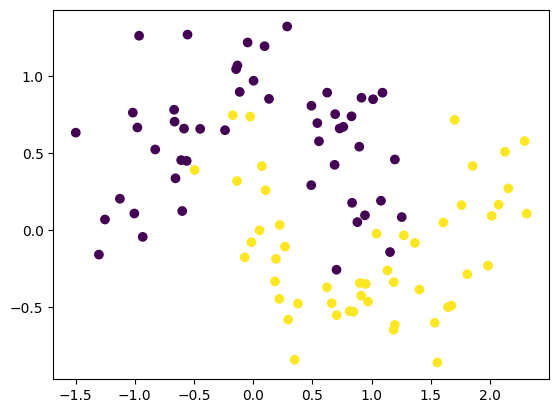

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# **ANN without Regularization**

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# used 2000 epochs to make an overfit model
history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=1)

Epoch 1/2000
3/3 [==============================] - 7s 414ms/step - loss: 0.5998 - accuracy: 0.6250 - val_loss: 0.3213 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.4084 - accuracy: 0.8250 - val_loss: 0.2111 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.3875 - accuracy: 0.8500 - val_loss: 0.2168 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.3721 - accuracy: 0.8500 - val_loss: 0.2403 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3600 - accuracy: 0.8500 - val_loss: 0.2380 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 32ms/step - loss: 0.3411 - accuracy: 0.8500 - val_loss: 0.2180 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 29ms/step - loss: 0.3576 - accuracy: 0.8375 - val_loss: 0.2395 - val_accuracy: 0.9000
Epoch 8/2000

9600/9600 [==============================] - 19s 2ms/step


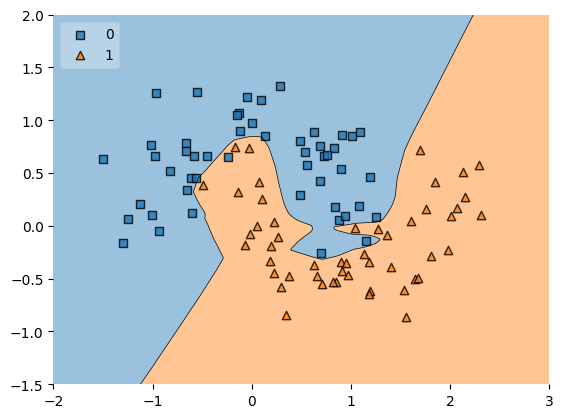

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

**Its clear that model is overfitting**

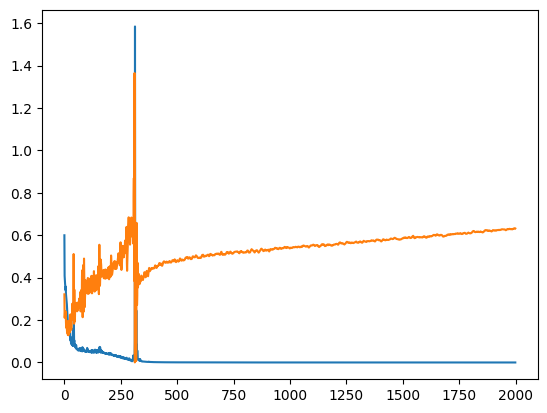

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

# **Model with L2 Regularization**

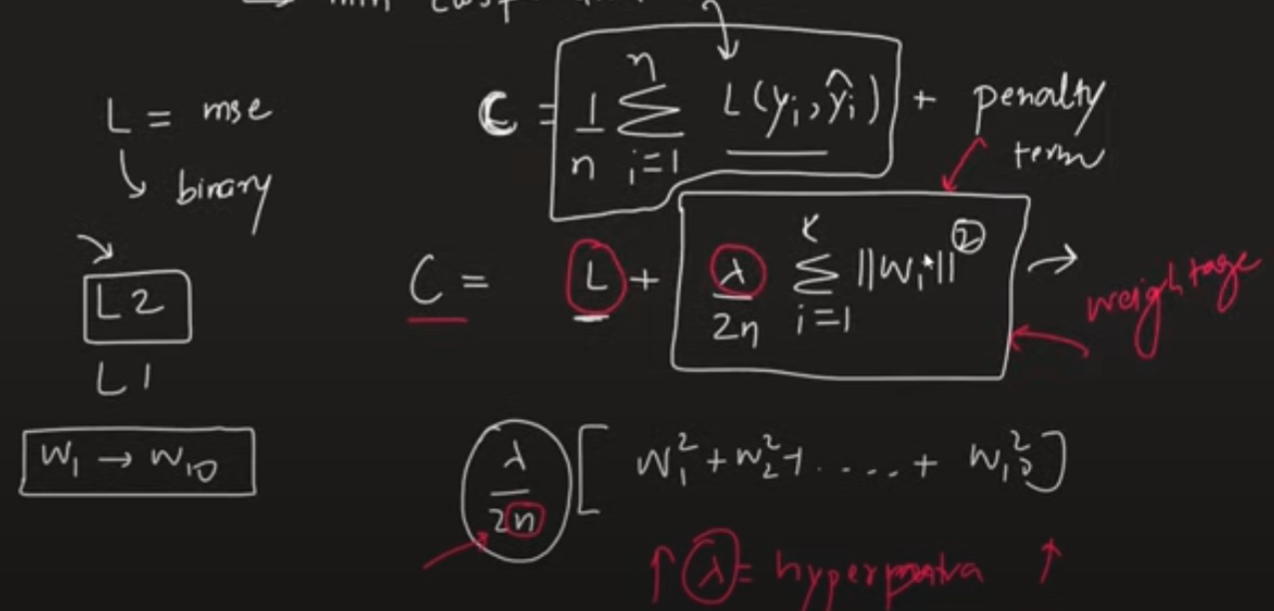

L1 also knows as(L1 norm) Regularization brings some weights equal to zero
L2 Regularization brings the weights approximately equal to zero (not exactly equal to zero)

Most of the time L2 performs best in case of deep learning

HINT: In regularization, the biases are not included, only weights are used to implement the penalty

In [8]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=1)

Epoch 1/2000
3/3 [==============================] - 1s 96ms/step - loss: 4.0487 - accuracy: 0.7500 - val_loss: 2.7130 - val_accuracy: 0.8500
Epoch 2/2000
3/3 [==============================] - 0s 15ms/step - loss: 2.3586 - accuracy: 0.7375 - val_loss: 1.5460 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 15ms/step - loss: 1.3662 - accuracy: 0.8125 - val_loss: 0.9004 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.8953 - accuracy: 0.8125 - val_loss: 0.6201 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.6856 - accuracy: 0.8125 - val_loss: 0.6124 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.6525 - accuracy: 0.8125 - val_loss: 0.5538 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.6516 - accuracy: 0.8375 - val_loss: 0.5192 - val_accuracy: 0.9000
Epoch 8/2000


9600/9600 [==============================] - 15s 2ms/step


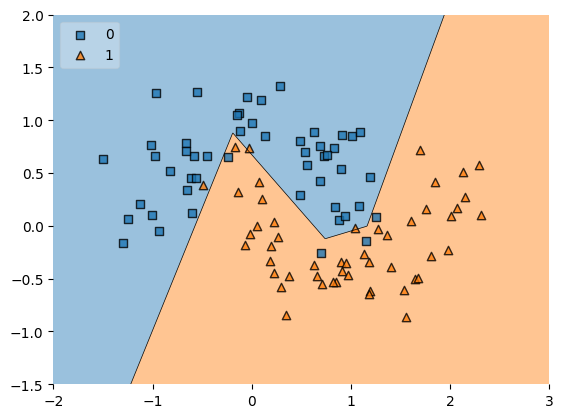

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

**much better than the previous one**

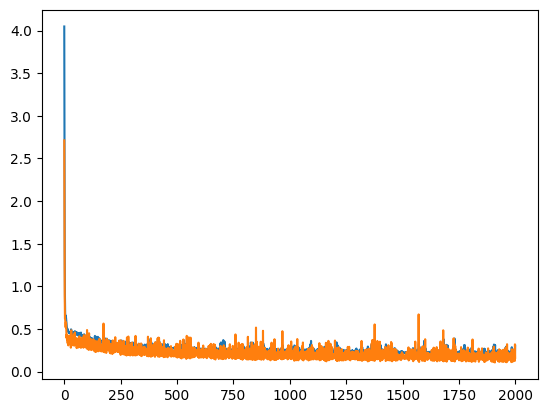

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [12]:
'''we have two inputs in the first layer with 128 neurons in the hidden layer, thus it becomes 256 weights'''
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

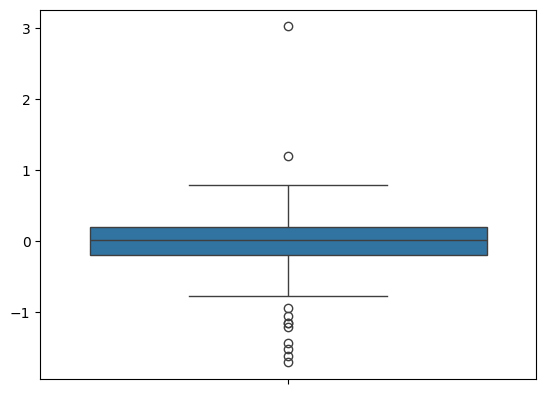

In [13]:
sns.boxplot(model1_weight_layer1)

**For model_1 without regularization, the weights are bit far from zero (more spread)**

<Axes: >

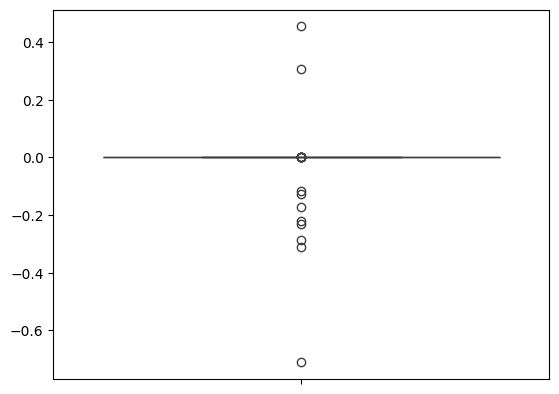

In [14]:
sns.boxplot(model2_weight_layer1)

**in case of model_2, regularization has caused the weights to get more closer to zero**

In [15]:
model1_weight_layer1.min()



-1.7120668

In [16]:
model1_weight_layer1.max()

3.017833

**Model 1 weights are more spreaded**

In [17]:
model2_weight_layer1.min()

-0.7105567

In [18]:
model2_weight_layer1.max()

0.45450163

**Model 2 weights are less spreaded now after regularization**

<ipython-input-19-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-19-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

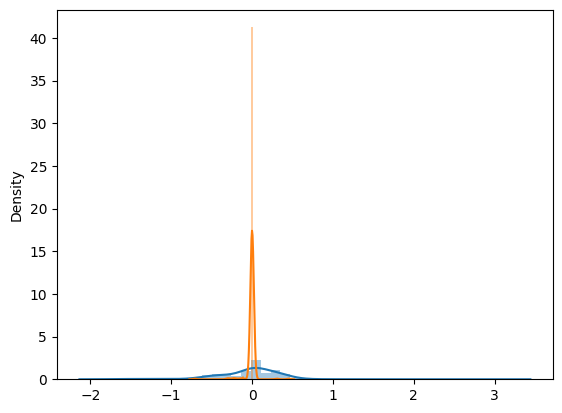

In [19]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

**Blue lines indicates more spread for model_1 w/o regularization**

**Orange lines indicates less spread for model_2 with regularization**